# Bias-variance trade-off Tutorial

This recitation aims to present the bias-variance trade-off through a practical example in Python.
The bias-variance trade-off refers to the balance between two competing properties of machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from math import pi 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

# 1. Generate synthetic data
As an example, we create our synthetic x and y by choosing a sine wave as relationship between the two:
$$y=x^3 - 2x^2 +x + e$$
where $0<x<2$. The noise follows a normal distribution with mean 0 and variance 0.25.

In [2]:
# number of observations
NUM_OBS = 500

# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
np.random.seed(123)
eps = np.random.normal(0, 0.5, NUM_OBS)
# outcome
y = x**3 - 2*x**2 + x + eps

Text(0, 0.5, 'y')

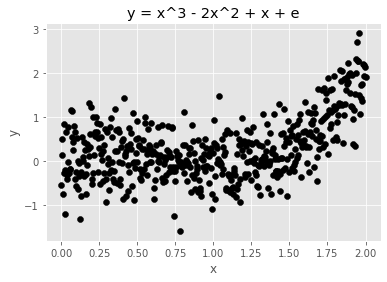

In [3]:
plt.scatter(x, y, c = 'k')
plt.title('y = x^3 - 2x^2 + x + e')
plt.xlabel("x")
plt.ylabel("y")

# 2. Train data and test data split

In a real-world scenario, we would not know the relationship between predictors and outcome.
Given a dataset, our task is to find suitable candidate models and choose the one that better fits our information.
To this aim, we split our data in, at least, two distinct sets:
* Train set: the portion of data to fit the model.
* Test set: the portion of data to evaluate the model performances.

As the test set contains data not seen before by the model, assessing the performances on that set provides a better estimate of how the model would perform on real-world, unseen data.

**Question 2.1.**  So we split our original data into train (80%) and test (20%) set. Use a random seed `random_state = 1` to keep the split fixed.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Question 2.2.**  Draw a scatter plot for all samples (including both training data and testing data). Use different color for training data and testing data.

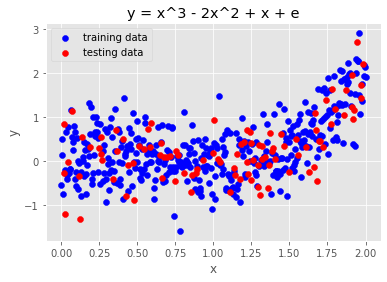

In [5]:
plt.scatter(x_train, y_train, c='b',label='training data')
plt.scatter(x_test, y_test, c='r',label='testing data')
plt.title('y = x^3 - 2x^2 + x + e')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now we want to train some models on the train set and assess their performances on the test set. Usually, we use the **Mean Square Error(MSE)**.

# 3. Bias and variance trade-off

Bias takes into account the difference between the model prediction and the real outcome.
Variance measures how different choices of the train sets would affect the the model parameters.

In order to illustrate these concepts in our example, we fit multiple polynomial models with increasing polynomial degree on the train set, and then observe the trend of the MSE over the increasing model complexity.

The first step, we want to create a data frame for the observed data.

**Question 3.1.** Create a data frame for training data with two columns, x and y.

In [6]:
train_data = pd.DataFrame(columns = ['x', 'y'], data = np.c_[x_train, y_train])
train_data.head()

,x,y
0,0.953908,0.299062
1,1.755511,1.894625
2,1.903808,1.264235
3,0.232465,0.884770
4,1.523046,0.811585


Next, we want create polynomial regression model.
* Linear regression model (order=1): $y=b_0+b_1x$
* Quandritic regression model (order=2): $y=b_0+b_1x +b_2x^2$
* ...
* More general polynomial regression model (for example, order=n): $y=b_0+b_1x + ... +b_nx^n$

The following is an example of build a linear regression model. `smf.ols` is used for creating a linear regression model; `y~x` means y is regressed on x.  

If you are confused with the following code, take it easy. We will introduce the details in the following class. You only need to understand the following code can help us build a linear model.

In [7]:
# Create a linear regression model
ols_model = smf.ols('y ~ x',train_data).fit()
ols_model.params

Intercept   -0.257076
x            0.590026
dtype: float64

In [8]:
# The estimation of b0
ols_model.params['Intercept']

-0.2570755365297791

In [9]:
# The estimation of b1
ols_model.params['x']

0.5900261085574687

**Question 3.2.** After obtaining the estimation of $b_0$ and $b_1$. Please specify the model, denoted as $\hat{f}(X)$?

\begin{equation}
    \hat f (X) = 0.590026 X - 0.257076
\end{equation}

Base on this model, we can make prediction for training data and testing data. The corresponding prediction of training data and testing data is recorded in `y_train_pred1` and `y_test_pred1`.

In [10]:
y_train_pred1 = ols_model.predict({"x": x_train})
y_test_pred1 = ols_model.predict({"x": x_test})

Text(0, 0.5, 'y')

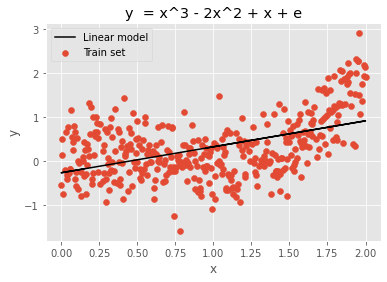

In [11]:
plt.scatter(x_train, y_train, label="Train set")
plt.plot(x_train,y_train_pred1,color="black",label="Linear model")
plt.title('y  = x^3 - 2x^2 + x + e')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

**Question 3.3.1.** Calculate the Bias and Variance of $\hat f$ by replicating the training set 500 times. 

In [12]:
x0 = 1 
f_true_0 = x0**3 - 2*x0**2 + x0
B0, B1, f_hat, E = [], [], [] ,[]
n     = 500
sigma = 0.5
model = LinearRegression()

for i in range(n):
    # replicating the training set
    x_train_loop = train_test_split(x, y, test_size = 0.2)[0]
    y_train_loop = train_test_split(x, y, test_size = 0.2)[2]

    # fitting the model
    model.fit(x_train_loop.reshape(-1, 1), y_train)
    
    # finding the intercept and slope
    b0 = model.intercept_
    b1 = model.coef_
    
    # finding f_hat:
    f_hat_0 = b0 + b1*x0

    # finding the variance:
    error = f_true_0 + np.random.normal(0, sigma, 1)
    var = (error - f_hat_0)**2
    
    # appending the data
    B0.append(b0)
    B1.append(b1)
    f_hat.append(f_hat_0[0])
    E.append(var)

In [13]:
# Variance
var_fhat_x0 = np.std(f_hat)**2
print("Variance = ", var_fhat_x0)

# Bias
biasx0_sq_fhat = (f_true_0 - np.mean(f_hat))**2
print("Bias = ",biasx0_sq_fhat)

Variance =  5.899313318873274e-07
Bias =  0.10442074498512977


The MSE of all testing data can be calculated by 

In [14]:
mean_squared_error(y_test_pred1, y_test)

0.38331136993459686

**Question 3.3.2.** What is the relationship between bias, variance and test MSE? 

<b>Bias</b> takes into account the difference between the model prediction and the real outcome.

<b>Variance</b> measures how different choices of the training sets would affect the the model parameters.

<b>MSE</b> determins how well the models predictions actually match the observed data.

**Question 3.4.** Before trying to fit the data with different orders of polynomial regression, please think about the test MSE of which order is the smallest? Why?

Given that our data fits a polynomial order 3, we expect the MSE to be lowest at the same polynomial degree

**Question 3.5.** We tried to fit the model with different polynomial degrees (order). The following is train/test MSE changes with the order. What's your finding? Which polynomial degree you will use? Why?

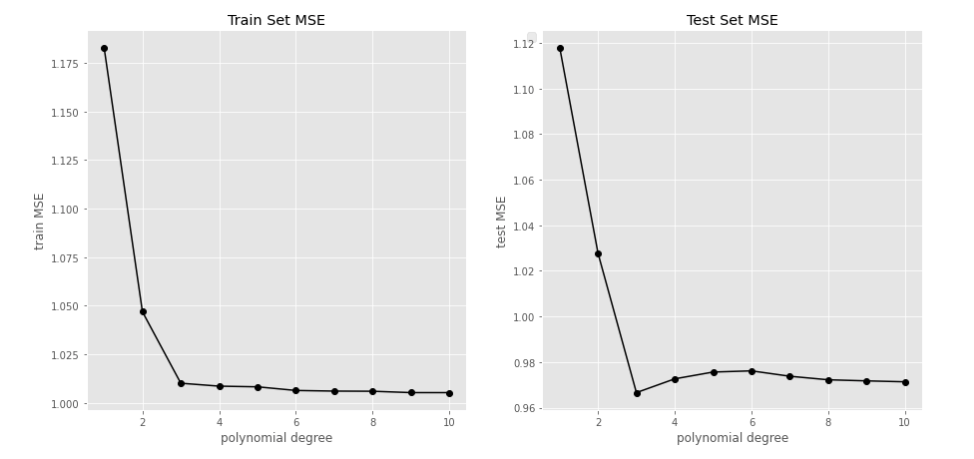

Polynomial degree 3, as it is the least complicated polynomial degree that results in the lowest MSE score

## 4. KNN regression

KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. In the recitation, the new data points is predicted by the voting method and the distance is calculated through the feature distance. In KNN regression, the distance is calculated through $x$ and the predict value is determined by the mean of its K nearest neighbors.

The corresponding python function is `KNeighborsRegressor`. As an example, the following is the code of KNN regression with `K=2` nearest neighbors.

In [15]:
from sklearn.neighbors import KNeighborsRegressor

## Build KNN model with K=2
neigh = KNeighborsRegressor(n_neighbors=2)

## Fit the model with training data
neigh.fit(x_train.reshape(-1,1), y_train) 

## make prediction on training data
y_train_pred = neigh.predict(x_train.reshape(-1,1))

**Notice** the first argument of `neigh.fit` and the argument of `neigh.predict` must be 2d array. So we use `.reshape`  convert `x_train` from 1d array to 2d array.

**Question 4.1.** Make prediction on testing dataset.

In [16]:
y_test_pred = neigh.predict(x_test.reshape(-1,1))

**Question 4.2.** Calculate the MSE between the true dependent value `y_train`, `y_test` and the prediciton `y_train_pred`, `y_test_pred`.

Hint: Use `mean_squared_error` function.

In [17]:
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

In [18]:
train_mse, test_mse

(0.1290276636842626, 0.34020962945921945)

**Question 4.3.** Draw a figure to compare the fitting result and the true curve. The figure should include the following information.
* Scatter plot for all samples. (both training and testing data)
* Line plot for the true curve. $y = x^3 - 2x^2 + x $
* Line plot for the fitted curve using KNN method with K=2.
* The color for the above three plot should be different and use a legend to show the labels of each plot.

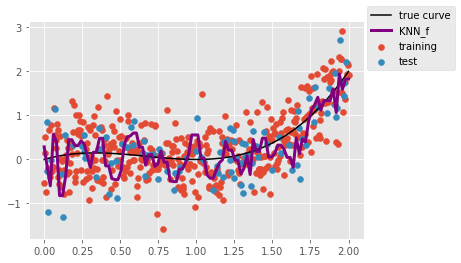

In [19]:
x_grid = np.linspace(0, 2, num = 100)
true_f = x_grid**3 - 2*x_grid**2 + x_grid

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_test.reshape(-1,1),y_test)
x_grid = np.linspace(0, 2, num = 100)
KNN_f = neigh.predict(x_grid.reshape((-1, 1)))

plt.plot(x_grid, true_f, c='black', label='true curve')
plt.plot(x_grid, KNN_f, c = 'purple', label = 'KNN_f', linewidth = 3)
plt.scatter(x_train,y_train,label='training')
plt.scatter(x_test,y_test,label='test')
plt.legend(loc=[1.01,.775])

**Question 4.4.**  Fit the model with different number of K from 2 to 8  and calculate the MSE for training data and testing data seperately.

In [20]:
train_er_list = np.array([])
for K in np.arange(2,9):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(x_train.reshape(-1,1),y_train)
    y_train_pred = knn.predict(x_train.reshape(-1,1))
    train_error_rate = mean_squared_error(y_train,y_train_pred)
    train_er_list = np.append(train_er_list,train_error_rate)
    
train_er_list

array([0.12902766, 0.17169768, 0.19836795, 0.20364894, 0.21158636,
       0.21463022, 0.22319543])

In [21]:
test_er_list = np.array([])
for K in np.arange(2,9):
    knn = KNeighborsRegressor(n_neighbors=K)
    knn.fit(x_test.reshape(-1,1),y_test)
    y_test_pred = knn.predict(x_test.reshape(-1,1))
    test_error_rate = mean_squared_error(y_test,y_test_pred)
    test_er_list = np.append(test_er_list,test_error_rate)
    
test_er_list

array([0.13519022, 0.16786417, 0.20241531, 0.18378538, 0.19164974,
       0.19953005, 0.21040398])

**Question 4.5.** Draw two figures side by side to show how training and testing MSE changes with K. Which K will you use to build the model? Why?

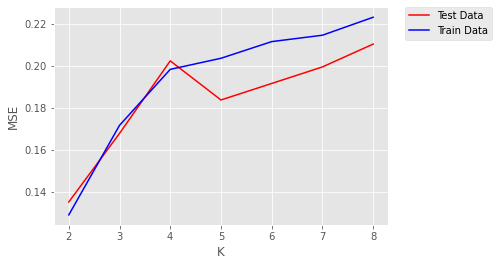

In [22]:
plt.plot(np.arange(2,9), test_er_list,c='red',label='Test Data')
plt.plot(np.arange(2,9), train_er_list,c='blue',label='Train Data')
plt.legend(loc=[1.05,.85])
plt.ylabel('MSE')
plt.xlabel('K')
plt.show()